# Logistic Regression

### what is Logistic Regression? It is a function that can be used to solve classification problems. 

In [1]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Below I generated a random dataframe. It contains three columns: X1, X2, and Y. We are going to use the first two columns (X1 and X2) to predict the third one (Y) which contains only ones and zeros.

In [53]:
x1 = np.random.rand(500)*20
#print(x1)
x2 = np.random.rand(500)*2
#print(x2)
df = pd.DataFrame(data = {'x1':x1, 'x2':x2})
df['y'] = np.where(df['x2']*df['x1']>5,1,0)
print(df.head())
print(df['y'].value_counts())

          x1        x2  y
0  17.664758  0.454464  1
1  19.753097  0.615590  1
2  11.836510  0.021683  0
3   4.424574  1.448509  1
4   8.329507  0.510006  0
y
1    322
0    178
Name: count, dtype: int64


Now let's plot our data. The blue and the pink dots represent the 1 and 0 in our target variable

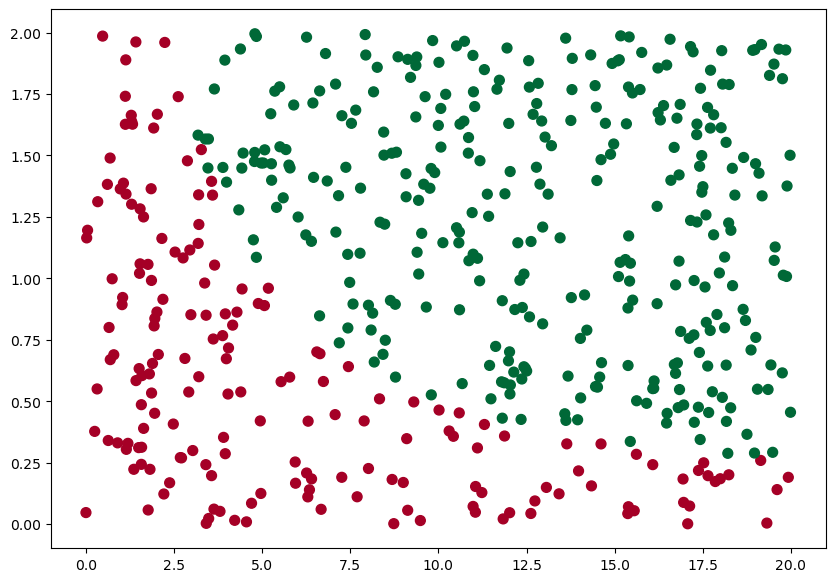

In [54]:
plt.figure(figsize = (10,7))
scatter = plt.scatter(df.x1,df.x2, s = 50, c = df.y, cmap = 'RdYlGn')

Looking at the above scatter plot it's clear that our data is very well divided into two groups. Our goal is to build a binary logistic regression model which would learn this division. The model will return the probability of a specific data point to be categorized as 1 P(y=1|X)

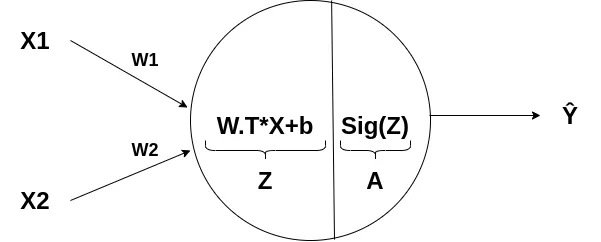

1. X1 and X2 are the data points as vectors
2. w1 and w2 are the weight of our model
3. Z is our linear model.
4. Sig(Z) is the sigmoid function.
5. Ŷ is the output of our model

### Why are we using Sigmoid function?

The value of Z can range from {-inf,inf}, so we need to map the value of Z to [0,1] to perform classification. 

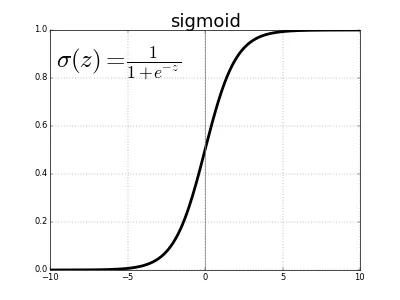

Now we will define our cost function to assess our model performance. For now I will say that we will use binary-cross entropy algorithm as our cost function because we are solving for a binary classification problem

The cost function is simply the mean of the loss function applied to all the instances. The idea behind using a cost function is finding the values of W and b by minimizing it. The way to minimizing is by applying the Gradient Descent algorithm which I will explain in another post. For now, we just need to know that we use the derivatives of our cost function along with a learning rate in order to update our W and b. The learning rate parameter is simply the step size that will update our model. If we choose a huge step, then our model might not learn. On another hand, if we choose a step too small then the learning will take too much time. Below, we see the final formulas:The cost function simply is the 

Repeat
* make prediction
* computes the cost of our prediction
* computes the gradients
* updates the W and b using the previous gradient 


This is the basic concept of logistic regression, now let's build the model

In [61]:
class logisticRegression:
    
    def __init__(self, df, X_cols, y_cols, iterations = 10000, learning_rate = 0.01):
        self.df = df
        self.X_cols = X_cols
        self.y_cols = y_cols
        self.iterations = iterations
        self.learning_rate = learning_rate
        
    def sigmoid(self,z):
        return 1/(1+ np.exp(-z))
    
    def train(self):
        #### intilializing W and b as zeroes
        w = np.zeros(len(self.X_cols)).reshape(len(self.X_cols),1)
        b = 0
        X = self.df[self.X_cols].to_numpy().T
        y = self.df[self.y_cols].to_numpy().T
        m = self.df.shape[0] 
        
        loss = []
        
        for i in range(self.iterations):
            #Computes our predictions
            z = np.dot(w.T, X) +b
            pred = self.sigmoid(z)
            
            #Computes cost
            cost = (-1/m)*np.sum(np.dot(y,np.log(pred).T) + np.dot(1-y,np.log(1-pred).T))
            
            loss.append(cost)
            
            #Computes the gradient 
            dw = (1/m)*np.dot(X,(pred-y).T)
            db = (1/m)*np.sum(pred-y, axis=1)
            
            #Updates the W and b
            w = w - self.learning_rate*dw
            b = b - self.learning_rate*db
        return {"W":w, "b": b, "loss": loss}

In [62]:
lg = logisticRegression(df, ['x1', 'x2'], ['y'])
model = lg.train()

In [64]:
        
def sigmoid(z):
    return 1/(1+ np.exp(-z))

def predict(X, W, b):
    pred = sigmoid(np.dot(W.T,X)+b)
    pred = [1 if prob >= 0.5 else 0 for prob in pred[0]]
    return pred
X = df[['x1', 'x2']].to_numpy().T
pred = predict(X, model['W'], model['b'])
print("Acuracy: ", np.array(pred == df.y).sum()/500)

Acuracy:  0.902
